# Applied Cartopy Example

### Import packages

In [127]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


### Cartopy is a package designed to process geospatial data and produce maps and other geospatial data products. 

### Cartopy utilizes NumPy, PROJ, and Shapely libraries, and it's programmatic interface is built on top of Matplotlib

### Cartopy is able to transform point, lines, vectors, polygons, and images between object oriented projections.

## Creating basic map with Cartopy and Matplotlib

### Use the PlateCarree projection to create a simple world map with coastlines added

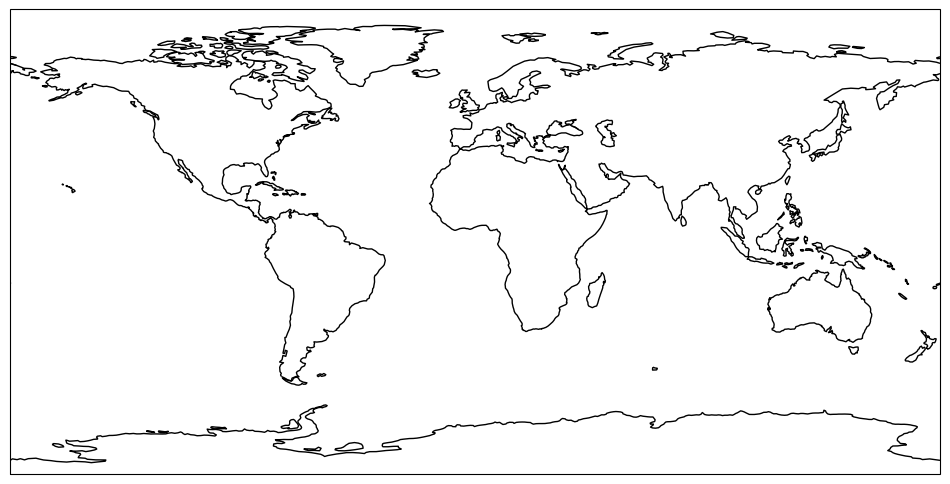

In [128]:
plt.figure(figsize=(12,10)) # creates a 12x10 figure

ax = plt.axes(projection=ccrs.PlateCarree())   # sets map projection to PlateCarree, simple lat-long projection
ax.coastlines()   # adds coastlines at 110 m resolution

plt.show()  # shows the figure

# Hurricane Michael

### Reading in data and cleaning up file

In [129]:
import matplotlib.pyplot as plt
import pandas as pd

In [130]:
file_path = 'hurricane_michael_hurdat.txt'

In [131]:
with open(file_path, 'r') as file:
    lines = file.readlines()

data_list = []
for line in lines:
    parts = line.strip().split(',')
    if len(parts) > 20:
        parts = parts[:20]
    data_list.append(parts)

# Define the columns based on your data
columns = ['date', 'time', 'empty', 'storm', 'latitude', 'longitude', 'wind_speed', 'pressure', 
           'other_data_1', 'other_data_2', 'other_data_3', 'other_data_4', 'other_data_5', 'other_data_6', 
           'other_data_7', 'other_data_8', 'other_data_9', 'other_data_10', 'other_data_11', 'other_data_12']

# Convert the list of lists into a DataFrame
df = pd.DataFrame(data_list, columns=columns)

# Preview the DataFrame
print(df.head())

       date   time empty storm latitude longitude wind_speed pressure  \
0  20181006   1800          LO     17.8     -86.6         25     1006   
1  20181007   0000          LO     18.1     -86.9         25     1004   
2  20181007   0600          TD     18.4     -86.8         30     1004   
3  20181007   1200          TS     18.8     -86.4         35     1003   
4  20181007   1800          TS     19.1     -85.7         45      999   

  other_data_1 other_data_2 other_data_3 other_data_4 other_data_5  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3          120          180            0            0            0   
4          120          180            0            0            0   

  other_data_6 other_data_7 other_data_8 other_data_9 other_data_10  \
0            0            0            0            0             0  

In [132]:
michael_sub = df.iloc[:,0:8]
print(michael_sub)

        date   time empty storm latitude longitude wind_speed pressure
0   20181006   1800          LO     17.8     -86.6         25     1006
1   20181007   0000          LO     18.1     -86.9         25     1004
2   20181007   0600          TD     18.4     -86.8         30     1004
3   20181007   1200          TS     18.8     -86.4         35     1003
4   20181007   1800          TS     19.1     -85.7         45      999
5   20181008   0000          TS     19.7     -85.5         50      996
6   20181008   0600          TS     20.2     -85.4         60      984
7   20181008   1200          HU     20.9     -85.1         65      982
8   20181008   1800          HU     21.7     -85.1         75      977
9   20181009   0000          HU     22.7     -85.2         85      971
10  20181009   0600          HU     23.7     -85.8         85      973
11  20181009   1200          HU     24.6     -86.2         90      968
12  20181009   1800          HU     25.6     -86.4        100      961
13  20

In [133]:
michael_final = michael_sub.drop(michael_sub.columns[2], axis=1)

In [134]:
print(michael_final)

        date   time storm latitude longitude wind_speed pressure
0   20181006   1800    LO     17.8     -86.6         25     1006
1   20181007   0000    LO     18.1     -86.9         25     1004
2   20181007   0600    TD     18.4     -86.8         30     1004
3   20181007   1200    TS     18.8     -86.4         35     1003
4   20181007   1800    TS     19.1     -85.7         45      999
5   20181008   0000    TS     19.7     -85.5         50      996
6   20181008   0600    TS     20.2     -85.4         60      984
7   20181008   1200    HU     20.9     -85.1         65      982
8   20181008   1800    HU     21.7     -85.1         75      977
9   20181009   0000    HU     22.7     -85.2         85      971
10  20181009   0600    HU     23.7     -85.8         85      973
11  20181009   1200    HU     24.6     -86.2         90      968
12  20181009   1800    HU     25.6     -86.4        100      961
13  20181010   0000    HU     26.6     -86.5        110      952
14  20181010   0600    HU

### Creating a map of Hurricane Michael's track using Cartopy

In [135]:
michael_final['latitude'] = pd.to_numeric(michael_final['latitude'])
michael_final['longitude'] = pd.to_numeric(michael_final['longitude'])

latitudes = michael_final['latitude']
longitudes = michael_final['longitude']

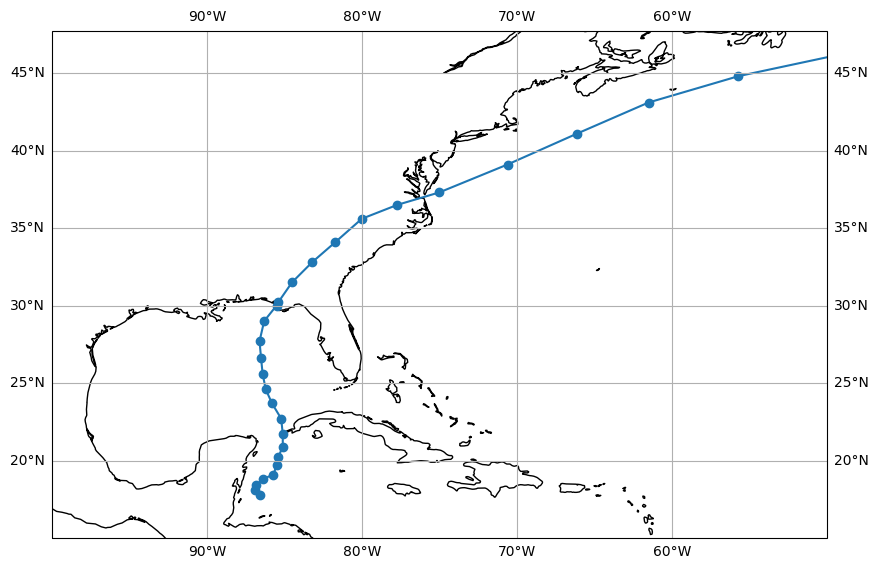

In [136]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-100, -50, 15, 45]) 
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True)

ax.plot(michael_final['longitude'], michael_final['latitude'], marker ='o', label = 'Michael Storm Track')
plt.show()

# Hurricane Micheal underwent rapid intensification just prior to making landfall in the Pandhandle of Florida. Lets explore sea surface temperatures closer to the coast around the time of landfall.

<xarray.DataArray 'sst' (time: 1, zlev: 1, lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2018-10-09T12:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * zlev     (zlev) float32 0.0
Attributes:
    long_name:  Daily sea surface temperature
    valid_min:  -300
    valid_max:  4500
    units:      Celsius


Text(0.5, 1.0, 'Sea Surface Temperature on October 9, 2018')

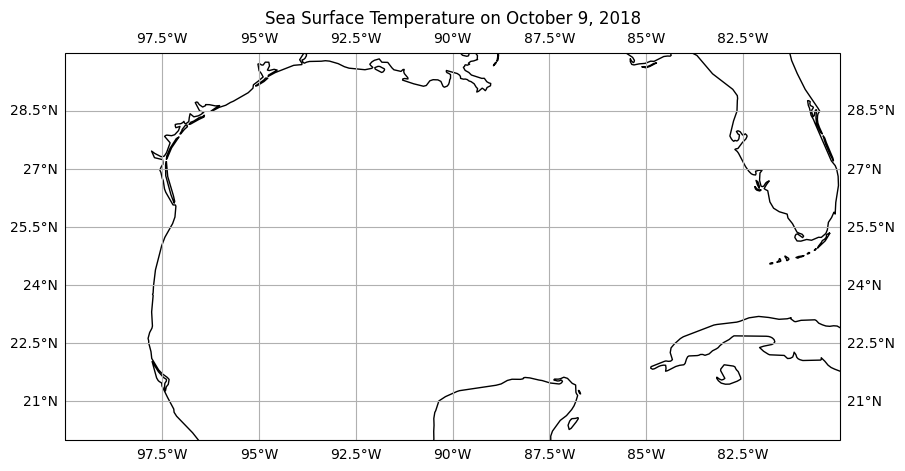

In [154]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

sst_data_1009 = xr.open_dataset('oisst-avhrr-v02r01.20181009.nc')
sst_data_1010 = xr.open_dataset('oisst-avhrr-v02r01.20181010.nc')
sst_data_1011 = xr.open_dataset('oisst-avhrr-v02r01.20181011.nc')
#print(sst_data_1009)

sst_data_1009['time'] = pd.to_datetime(sst_data['time'].values)
sst_1009 = sst_data_1009['sst']
print(sst_1009)

sst_data_1010['time'] = pd.to_datetime(sst_data['time'].values)
sst_1010 = sst_data_1010['sst']

sst_data_1011['time'] = pd.to_datetime(sst_data['time'].values)
sst_1011 = sst_data_1011['sst']

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-100, -80, 20, 30])
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True)

sst_1009_plot = plt.plot(ax=ax, cmap='coolwarm', cbar_kwargs={'label': 'Sea Surface Temperature (°C)'})
plt.title('Sea Surface Temperature on October 9, 2018')